# **Airbnb**
# Aprendizaje No Supervisado

## K Means  

En esta notebook aplicaremos tecnicas de Clustering sobre el dataset de airbnb.  
  
En particular, utilizaremos KMeans, para clusterizar el conjunto de datos __train_users__

Utilizaremos un subconjunto de features del dataset original, para poder explorar y visualizar como quedan conformados los clusters.  

Exploraremos distintas metricas para poder evaluar los clusters conformados.

Luego, iremos agregando features, continuando con el analisis de las metricas.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import itertools

from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_samples, silhouette_score


from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import KElbowVisualizer

import warnings

%load_ext autoreload
%autoreload 2

warnings.filterwarnings('ignore')


In [2]:
dataset_path = "..//datos//"
abnb_users_curated = "modified_train_users.csv"

In [3]:
users_df = pd.read_csv( dataset_path + abnb_users_curated )

In [4]:
# Print the number of records and the total number of movies
print('The dataset contains: ', len(users_df),' users.')

The dataset contains:  121070  users.


In [5]:
users_df.head()

,Unnamed: 0,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,...,first_browser,country_destination,has_booked,total_seconds,average_seconds,total_sessions,number_of_devices,gender_0,gender_1,gender_2
0,1,820tgsjxq7,1306281600,1243100889,-9223372037,1,38,1,0,5,...,7,0,False,0.0,0.0,1,1,0,1,0
1,2,4ft3gnwmtx,1285632000,1244589167,1280707200,0,56,0,3,5,...,14,1,True,0.0,0.0,1,1,1,0,0
2,3,bjjt8pjhuk,1323043200,1256968889,1347062400,0,42,1,0,5,...,13,2,True,0.0,0.0,1,1,1,0,0
3,4,87mebub9p4,1284422400,1260252665,1266451200,2,41,0,0,5,...,7,1,True,0.0,0.0,1,1,0,0,1
4,6,lsw9q7uk0j,1262390400,1262395558,1262649600,0,46,0,0,5,...,30,1,True,0.0,0.0,1,1,1,0,0


In [6]:
users_df['first_device_type'].unique()


array([3, 6, 8, 2, 1, 4, 7, 0, 5])

In [7]:
users_df['age'] = users_df['age'].astype(int)


In [8]:
users_has_booked_df = users_df[ users_df['has_booked'] == True]

users_to_cluster_df = users_has_booked_df[ ['age','gender', 'first_device_type', 'country_destination']]

## TO SPEED UP...
users_to_cluster_df = users_to_cluster_df.sample(1000)

print( "Number of records: ", len(users_to_cluster_df))

users_to_cluster_df.head()

Number of records:  1000


,age,gender,first_device_type,country_destination
112935,31,0,3,2
7466,42,1,3,2
29718,36,1,3,1
94388,30,1,3,1
26295,44,1,3,1


In [9]:
# Let's turn our dataset into a list
users_to_cluster = users_to_cluster_df.values

In [10]:
def add_cluster_to_dataset( original_df, predictions):
    return  pd.concat([original_df.reset_index(), pd.DataFrame({'group':predictions})], axis=1)

# Clustering

## Metricas - Silhouette

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a __measure of how close each point in one cluster is to points in the neighboring clusters__ and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as):  
* near +1 indicate that the sample is far away from the neighboring clusters. 
* A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and   
* negative values indicate that those samples might have been assigned to the wrong cluster


k =  2


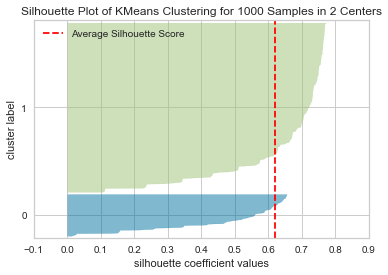

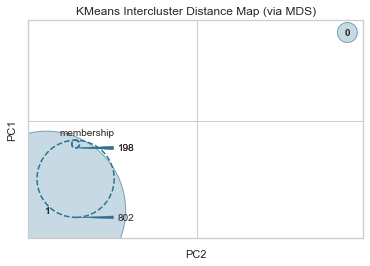


k =  3


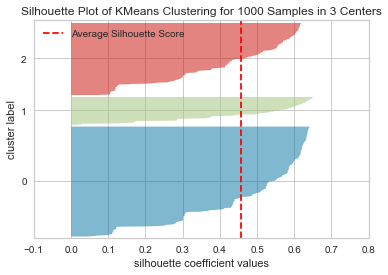

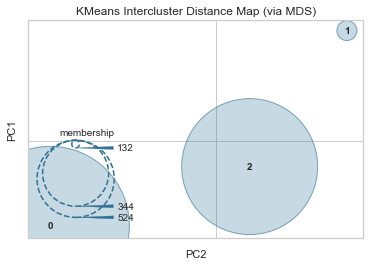


k =  4


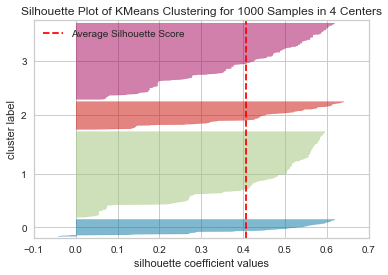

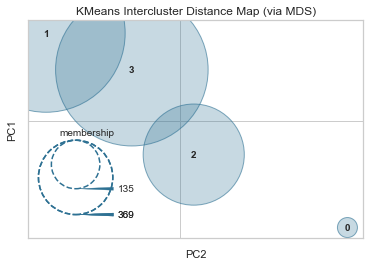


k =  5


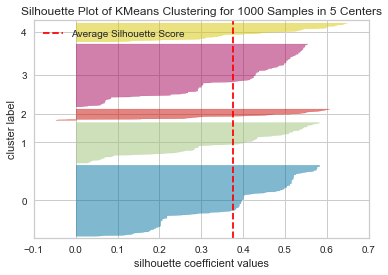

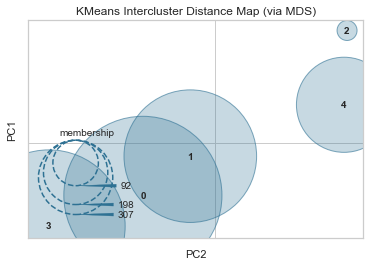

In [11]:
# Clusters to generate

k_sets = [2,3,4,5]

for k in k_sets:
    
    print("\nk = ", k)
    
    clusterer = KMeans( k, random_state=7 )
    
    predictions = clusterer.fit_predict( users_to_cluster )
 
    # print("Inertia: ", clusterer.inertia_ )
    # print("Centers: ", clusterer.cluster_centers_)

    visualizer = SilhouetteVisualizer(clusterer, colors='yellowbrick')
    visualizer.fit(users_to_cluster)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

    # Instantiate the clustering model and visualizer
    visualizer = InterclusterDistance( clusterer )
    visualizer.fit(users_to_cluster)        # Fit the data to the visualizer
    visualizer.show()        # Finalize and render the figure

## Métricas - Elbow technique

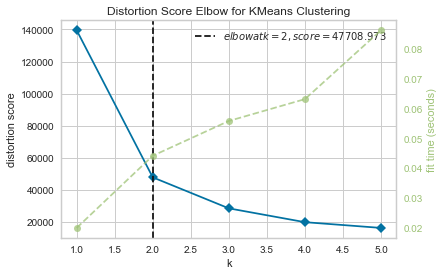

In [13]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,6) )
visualizer.fit( users_to_cluster )        # Fit the data to the visualizer
visualizer.show()   

## Conclusión análisis clusterización  

Tanto del analisis del grafico de Elbox, como de las Silhoutes, se observa que k = 2 es la mejor opcion para clusterizar los datos

## Analisis de los clusters para k=2  

Intentamos visualizar como estan conformados los clusters (que elementos agrupa), para k = 2, que es la cantidad optima de clusters segun las metricas analizadas previamente.

In [14]:

clusterer = KMeans( 2, random_state=7 )
    
predictions = clusterer.fit_predict( users_to_cluster )

clustered = add_cluster_to_dataset(users_to_cluster_df, predictions)

clustered.head()


,index,age,gender,first_device_type,country_destination,group
0,12012,43,0,7,1,1
1,103221,39,0,8,5,0
2,16619,29,0,6,3,0
3,90217,45,2,6,5,1
4,45397,48,1,3,1,1


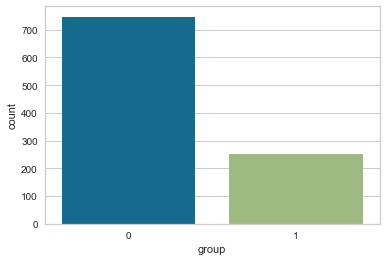

In [15]:
sns.countplot(data = clustered, x='group', )

### Feature __age__  

Observamos como se distribuyen los datos, en los clusters creados, en relación a la feature __age__

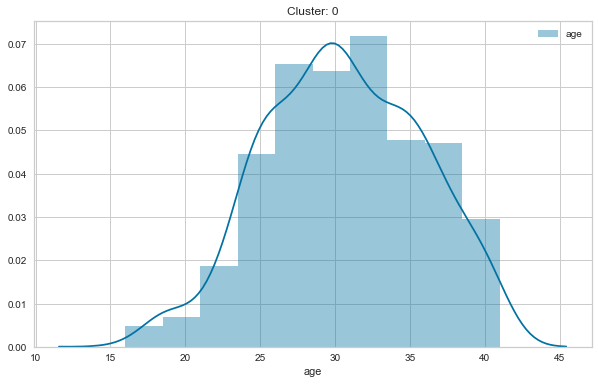

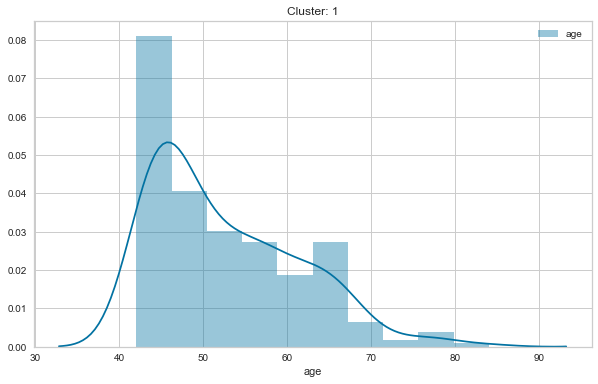

In [16]:
for cluster in range (0,2):
    
    cluster_to_show = clustered[ clustered['group'] == cluster]
    
    plt.figure(figsize=(10,6))
    sns.distplot(cluster_to_show['age'].dropna(), bins=10, label='age')
    plt.title('Cluster: ' + str(cluster) )
    plt.legend()

### Feature __gender__

Cantidad de __gender__ por cluster

In [17]:
clustered.groupby(['group','gender'])['gender'].count()

group  gender
0      0         353
       1         289
       2         105
1      0         117
       1          93
       2          43
Name: gender, dtype: int64

In [18]:
clustered.groupby(['gender','group'])['gender'].count()

gender  group
0       0        353
        1        117
1       0        289
        1         93
2       0        105
        1         43
Name: gender, dtype: int64

Relación __age__ y __gender__

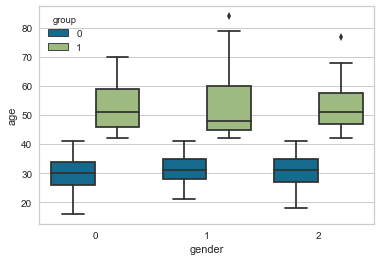

In [19]:
#sns.catplot(x='gender', y='age', kind='box', data=clustered , hue='group' )
sns.boxplot(data = clustered, x='gender', y ='age' ,  hue='group' )

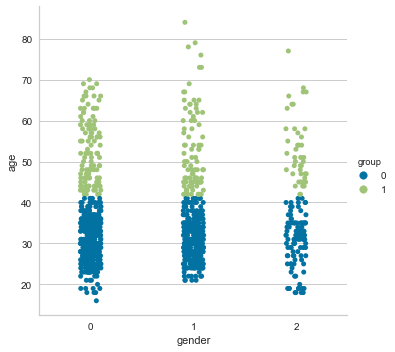

In [20]:
sns.catplot(x='gender', y='age', data=clustered , hue='group' , jitter=True )

### Relación __age__ y __first_device_type__

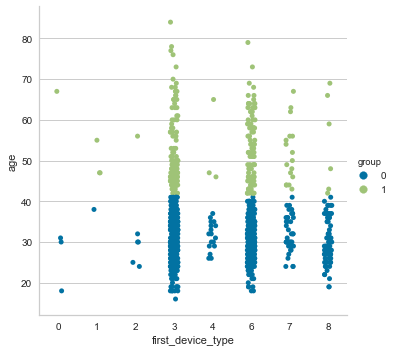

In [21]:
sns.catplot(y='age', x='first_device_type', data=clustered , hue='group' , jitter=True )

### Relación __gender__ y __first_device_type__

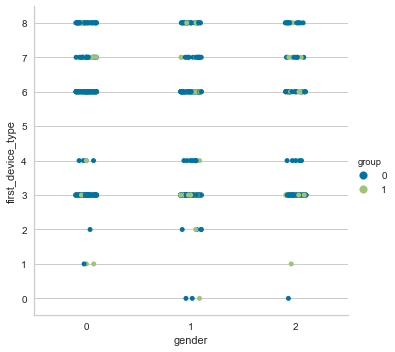

In [22]:
sns.catplot(x='gender', y='first_device_type', data=clustered , hue='group' , jitter=True )

### Agrupamiento sobre __country_destination__

Intentamos observar si existe algun criterio de separación por __country_destination__

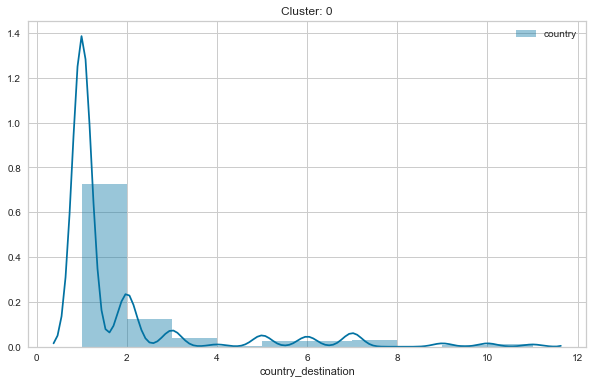

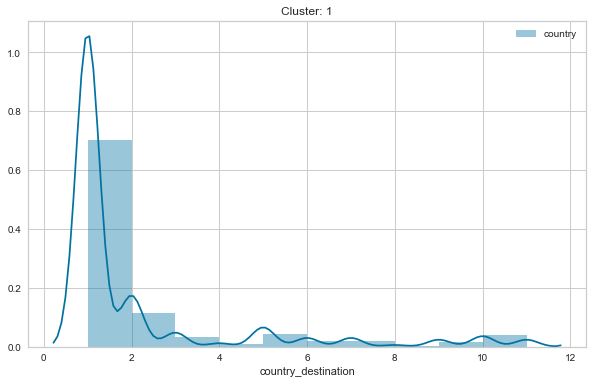

In [23]:
for cluster in range (0,2):
    
    cluster_to_show = clustered[ clustered['group'] == cluster]
    
    plt.figure(figsize=(10,6))
    sns.distplot(cluster_to_show['country_destination'].dropna(), bins=10, label='country')
    plt.title('Cluster: ' + str(cluster) )
    plt.legend()

In [24]:
clustered.groupby(['country_destination','group'])['country_destination'].count()

country_destination  group
1                    0        542
                     1        178
2                    0         94
                     1         29
3                    0         29
                     1          8
4                    0          4
                     1          2
5                    0         20
                     1         11
6                    0         18
                     1          5
7                    0         24
                     1          5
8                    1          1
9                    0          6
                     1          4
10                   0          6
                     1          6
11                   0          4
                     1          4
Name: country_destination, dtype: int64

## Conclusiones  

Como primera observación, vemos que los clusters estan desbalanceados.  

Adicionalmente, observamos que en los dos clusters, existe una clara separacion de usuarios en rangos de edades.  
El primer cluster, tiene usuarios con edades hasta XXX, mientras que el segundo cluster contiene usuarios de XXX hasta YYY.

Cuando se intentó agrupar en más clusters, la división fue tambien por grupos etarios.

Con respecto a las otras features, no podemos observar una division clara.

Otra conclusión es que no se observan demasiadas diferencias en el armado de los clusters, al ir incorporando features. El análisis comenzó utilizando solo __age__ y __gender__ como características y luego fueron agregandose el resto.

En todos los casos, se mantuvo la separacion de usuarios en clusters agrupando por edad.

Desde el punto de vista de las metricas (Elbow, Silhoutte) no varian demasiado al incorporar nuevas features.

Como conclusión final, no vemos gran utilidad en la utilización de clusters para realizar predicciones. Los clusters encontrados son bastante obvios (usuarios menores a determinada edad)